# Graded Challenge 2

MARWAN MUSA - BATCH 12

### Query from Google Cloud Platform

- SELECT trips.trip_id, trips.start_date, trips.start_station_name, trips.end_station_name, 
trips.start_station_latitude, trips.start_station_longitude, trips.end_station_latitude,
trips.end_station_longitude, stations.region_id
- FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` AS trips
- JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` AS stations
- ON trips.start_station_id = stations.station_id
- WHERE (trips.start_station_name != trips.end_station_name) AND
(trips.start_station_latitude IS NOT NULL) AND
(trips.start_station_longitude IS NOT NULL) AND
(trips.end_station_latitude IS NOT NULL) AND
(trips.end_station_longitude IS NOT NULL) AND
(trips.start_date >= '2017-10-23' AND trips.start_date <= '2018-03-23');


In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
df.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,212018010110534700,2018-01-01 10:53:47 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,12432017102516270000,2017-10-25 16:27:00 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,12142017120818404800,2017-12-08 18:40:48 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,9632017102416214300,2017-10-24 16:21:43 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,10832018022811584000,2018-02-28 11:58:40 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12


In [6]:
df.tail()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
453800,29322018030117581600,2018-03-01 17:58:16 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453801,5032017111014205100,2017-11-10 14:20:51 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453802,5062018030213114400,2018-03-02 13:11:44 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453803,31012017112510285700,2017-11-25 10:28:57 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453804,1872018022017234600,2018-02-20 17:23:46 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3


## Problem 1
Kamu adalah seorang data scientist di San Francisco Smart City. Kamu sedang mengerjakan proyek untuk menganalisa dan mengoptimasi sistem pesepedaan. Tugas pertamamu, kamu harus mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung **PageRank** menggunakan *Eigendecomposition*.

Dalam mencapai tujuan ini, langkah-langkahnya adalah:

1a. Buat dua variable baru yang bernama `start_stations` dan `end_stations` yang masing-masing berisikan list nama stasiun awal dan stasiun akhir. <br>`*Notes : tidak ada nama stasiun yang duplikat di masing-masing variable`.

In [7]:
start_stations = df.start_station_name.drop_duplicates()
end_stations = df.end_station_name.drop_duplicates()

2a. Mendeteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor) menggunakan `np.setxor1d(array1,array2)`. <br>Outputnya akan berupa numpy array dan dimasukkan ke dalam variable bernama `exclusive_stations`.

In [8]:
exclusive_stations = np.setxor1d(start_stations, end_stations)
exclusive_stations

array(['2nd St at S Park St', '5th St at Brannan St',
       '5th St at Howard St', '7th St at Brannan St',
       'Colin P Kelly Jr St at Townsend St (Temporary Site)',
       'Franklin St at 14th St', 'Golden Gate Ave at Hyde St',
       'Irwin St at 8th St', 'Jackson St at 14th St',
       'Laguna St at McAllister St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Tamien Station', 'W St John St at Guadalupe River Trail',
       'Webster St at 17th St', 'Woolsey St at Sacramento St'],
      dtype=object)

3a. Buat dataframe yang berisikan cross-tabulation antara `start_station` dan `end_station` di DataFrame awal menggunakan `pd.crosstab(pd.Series1,pd.Series2)`. Hasil dari langkah ini akan menghasilkan dataframe yang menginfokan berapa jumlah/frekuensi perjalanan dari start station tertentu ke end station tertentu. Hasil dari langkah ini dimasukkan ke dalam variable bernama `df_matrix`.

In [9]:
df_matrix = pd.crosstab(df.start_station_name, df.end_station_name)
df_matrix

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Webster St at 19th St,Webster St at 2nd St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Woolsey St at Sacramento St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,31,0,0,3,4,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10th St at Fallon St,33,0,0,0,202,24,2,0,6,0,...,0,1,0,0,2,0,0,0,0,0
11th St at Bryant St,0,0,0,53,0,0,0,0,0,15,...,0,0,5,9,0,0,0,0,0,9
11th St at Natoma St,0,0,75,0,0,0,0,0,0,23,...,0,0,8,24,0,0,0,0,0,8
12th St at 4th Ave,3,333,0,0,0,1,3,0,0,0,...,0,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0,1,0,0,0,0,4,83,440,0,...,1,8,0,0,0,9,0,0,0,0
West St at 40th St,0,0,0,0,0,0,0,0,2,0,...,2,0,0,0,3,0,0,0,1,0
William St at 10th St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4a. Buat salinan dari data yang di-load ke dalam variable bernama `df_copy`.

In [10]:
df_copy = df.copy()
df_copy

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,212018010110534700,2018-01-01 10:53:47 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,12432017102516270000,2017-10-25 16:27:00 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,12142017120818404800,2017-12-08 18:40:48 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,9632017102416214300,2017-10-24 16:21:43 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,10832018022811584000,2018-02-28 11:58:40 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
...,...,...,...,...,...,...,...,...,...
453800,29322018030117581600,2018-03-01 17:58:16 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453801,5032017111014205100,2017-11-10 14:20:51 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453802,5062018030213114400,2018-03-02 13:11:44 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
453803,31012017112510285700,2017-11-25 10:28:57 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3


5a. Filter `df_copy` dimana tidak ada `start_station_name` dan `end_station_name` yang termasuk dalam list `exclusive_stations`.

In [11]:
df_copy = df_copy[
        (~df_copy['start_station_name'].isin(exclusive_stations)) &
        (~df_copy['end_station_name'].isin(exclusive_stations))
]

6a. Mengulangi **langkah 3a** untuk variable `df_copy` dan disimpan ke dalam variable bernama `df_matrix_square`. <br>**Dengan jumlah rows dan columns sama**.

In [12]:
df_matrix_square = pd.crosstab(df_copy.start_station_name, df_copy.end_station_name)
df_matrix_square

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at Kearny St,Webster St at 19th St,Webster St at 2nd St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,31,0,0,3,4,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10th St at Fallon St,33,0,0,0,202,24,2,0,6,0,...,0,0,1,0,0,2,0,0,0,0
11th St at Bryant St,0,0,0,53,0,0,0,0,0,15,...,2,0,0,5,9,0,0,0,0,9
11th St at Natoma St,0,0,75,0,0,0,0,0,0,23,...,4,0,0,8,24,0,0,0,0,8
12th St at 4th Ave,3,333,0,0,0,1,3,0,0,0,...,0,0,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0,1,0,0,0,0,4,83,440,0,...,0,1,8,0,0,0,9,0,0,0
West St at 40th St,0,0,0,0,0,0,0,0,2,0,...,0,2,0,0,0,3,0,0,0,0
William St at 10th St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7a. Nilai kolom masing-masing rows pada `df_matrix_square` dijumlahkan menggunakan method `sum(axis=1)` dan disimpan ke dalam variable bernama `total_trips`.

In [13]:
total_trips = df_matrix_square.sum(axis = 1)
total_trips

start_station_name
10th Ave at E 15th St                                     179
10th St at Fallon St                                     1056
11th St at Bryant St                                     1988
11th St at Natoma St                                     1911
12th St at 4th Ave                                        862
                                                         ... 
West Oakland BART Station                                2103
West St at 40th St                                        232
William St at 10th St                                     327
Willow St at Vine St                                       30
Yerba Buena Center for the Arts (Howard St at 3rd St)    2545
Length: 275, dtype: int64

8a. Membagi setiap kolom `df_matrix_square` dengan menggunakan method `.div()`, dengan inputan parameter `total_trips` dan `axis='rows'`. <br>Hasilnya dimasukkan ke variable `weighted_matrix_df`.

In [14]:
weighted_matrix_df = df_matrix_square.div(total_trips, axis = 'rows')
weighted_matrix_df

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at Kearny St,Webster St at 19th St,Webster St at 2nd St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0.00000,0.173184,0.000000,0.000000,0.016760,0.022346,0.005587,0.000000,0.000000,0.000000,...,0.000000,0.005587,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000
10th St at Fallon St,0.03125,0.000000,0.000000,0.000000,0.191288,0.022727,0.001894,0.000000,0.005682,0.000000,...,0.000000,0.000000,0.000947,0.000000,0.000000,0.001894,0.00000,0.0,0.0,0.000000
11th St at Bryant St,0.00000,0.000000,0.000000,0.026660,0.000000,0.000000,0.000000,0.000000,0.000000,0.007545,...,0.001006,0.000000,0.000000,0.002515,0.004527,0.000000,0.00000,0.0,0.0,0.004527
11th St at Natoma St,0.00000,0.000000,0.039246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012036,...,0.002093,0.000000,0.000000,0.004186,0.012559,0.000000,0.00000,0.0,0.0,0.004186
12th St at 4th Ave,0.00348,0.386311,0.000000,0.000000,0.000000,0.001160,0.003480,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003480,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0.00000,0.000476,0.000000,0.000000,0.000000,0.000000,0.001902,0.039467,0.209225,0.000000,...,0.000000,0.000476,0.003804,0.000000,0.000000,0.000000,0.00428,0.0,0.0,0.000000
West St at 40th St,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008621,0.000000,...,0.000000,0.008621,0.000000,0.000000,0.000000,0.012931,0.00000,0.0,0.0,0.000000
William St at 10th St,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000


9a. Mengkonversikan `weighted_matrix_df` ke `numpy array`.

In [15]:
np.array(weighted_matrix_df)

array([[0.        , 0.17318436, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03125   , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00452716],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00785855, ..., 0.        , 0.        ,
        0.        ]])

10a. Menghitung *eigen value* dan *eigen vector* menggunakan library `numpy`.

In [16]:
eig_val, eig_vec = np.linalg.eig(np.array(weighted_matrix_df))

11a. Score `PageRank` terdapat pada *eigen vector* yang memiliki *eigen value* paling tinggi. <br>*eigen vector* tersebut akan disimpan ke dalam variable bernama `PR_Scores`.

In [17]:
print('posisi eigen value terbesar: ', eig_val.argmax())

posisi eigen value terbesar:  1


In [18]:
PR_Scores = eig_vec[1]

12a. Membuat dataframe baru bernama `PageRank_df` dengan kolom 'start_station' yang berisikan value variable `start_station_name` dari `df_matrix_square` hasil *cross tabulation*, dan kolom `score` yang berisikan value variable `PR_Scores`.

In [19]:
PageRank_df = pd.DataFrame({'start_station': df_matrix_square.index,
                            'score' : PR_Scores
                            })
PageRank_df

,start_station,score
0,10th Ave at E 15th St,9.218467e-02+0.000000e+00j
1,10th St at Fallon St,-6.030227e-02+0.000000e+00j
2,11th St at Bryant St,-7.387106e-04+0.000000e+00j
3,11th St at Natoma St,-6.528622e-02+0.000000e+00j
4,12th St at 4th Ave,7.660841e-04+0.000000e+00j
...,...,...
270,West Oakland BART Station,-1.297478e-05+0.000000e+00j
271,West St at 40th St,-4.279323e-04+0.000000e+00j
272,William St at 10th St,7.963378e-04+0.000000e+00j
273,Willow St at Vine St,1.656355e-05+0.000000e+00j


13a. `head` dari dataframe `PageRank_df`!

In [20]:
PageRank_df.head()

,start_station,score
0,10th Ave at E 15th St,0.092185+0.000000j
1,10th St at Fallon St,-0.060302+0.000000j
2,11th St at Bryant St,-0.000739+0.000000j
3,11th St at Natoma St,-0.065286+0.000000j
4,12th St at 4th Ave,0.000766+0.000000j


**Jawab Pertanyaan Berikut:**

### a. Mengapa dalam kasus ini kita menerapkan konsep *Eigendecomposition*?<br>


`"Whenever there is a complex system having a large number of dimensions with a large number of data, eigenvectors and eigenvalues concepts help in transforming the data into a set of most important dimensions (principal components). This will result in processing the data in a faster manner."`

>Eigendecomposition adalah faktorisasi suatu matriks dalam bentuk *eigenvalue* dan *eigenvector*. Misal terdapat suatu matriks square ${A}$ dimana : <br>
${A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$, dengan $\mathbf{Q}$ merupakan *eigenvector* dan ${\Lambda}$ merupakan matriks diagonal yang tiap elemen diagonalnya merupakan *eigenvalue*.
<br>
Terkait penerapannya untuk *PageRank algorithm* yang diterapkan ke dalam *Favorite Biketrips Station Classification* ini, setiap trips dari atau ke stasiun 1 dengan stasiun lainnya dipetakan ke dalam suatu matriks ${A}$. Nyatanya, semakin banyak trips yang terjadi dari satu stasiun ke stasiun lainnya, maka nilai dari elemen-elemen matriks ${A}$ pun akan berubah seiring berjalannya waktu. <br>
Secara teori, perubahan nilai itu dimisalkan dengan ${A}^{P}$. Dan dengan melakukan perhitungan metematis sederhana, <br>
jika ${A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$, maka ${A}^{P}=\mathbf{Q}\mathbf{\Lambda}^{P}\mathbf{Q}^{-1}$, <br>
dari sini dapat disimpulkan bahwa iterasi perubahan terhadap ${A}$ hanya akan mempengaruhi nilai dari matriks ${\Lambda}$, sehingga dengan mengetahui nilai-nilai *eigenvalue* di matriks ${\Lambda}$, akan dapat diketahui nilai *eigenvalue* terbesar dan *eigenvector* yang berkorelasi dengan *eigenvalue* tersebut. <br>Untuk kasus station biketrips ini, dapat diketahui dimana stasiun favorit atau yang paling sering dilewati berdasarkan nilai elemen *eigenvector* terbesar sebagai PageRank skornya.  

### b. Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe `df_matrix_square` dibandingkan `df_matrix` untuk dilakukan proses *Eigendecomposition*? Berikan alasan yang logis sesuai dengan konsep *Eigendecomposition*.

>Karena `df_matrix` merupakan matrix non square (yang dapat dilihat dari **#kode-1** bahwa matrix ini memiliki 275 rows dan 290 columns). Sedangkan *"jumlah rows dan column yang sama"* merupakan syarat utama suatu matrix agar bisa di faktorisasi ke dalam bentuk *eigenvalue* dan *eigenvector* nya, karena non square matrix tidak memiliki determinant (**#kode-2**), dan tidak invertible (**#kode-3**) sehingga tidak dapat diperoleh *eigenvalue* dan *eigenvector* (**#kode-4**)

***#kode-2, #kode-3, #kode-4 akan menampilkan error jika di-execute***

In [21]:
df_matrix.shape #kode-1

(275, 290)

In [ ]:
#kode-2

np.linalg.det(df_matrix) #error

In [ ]:
#kode-3

np.linalg.inv(df_matrix) #error

In [ ]:
#kode-4

eig_valt, eig_vect = np.linalg.eig(np.array(df_matrix)) #error

### c. Jika dilihat dari PageRanknya, dimana nilai PageRank paling besar merupakan stasiun yang paling favorit. Apa insight yang akan kamu berikan?

Dari dataframe PageRank_df yang telah diperoleh, dapat disimpulkan bahwa:

>5 data stasiun yang paling sering dilewati yaitu

In [23]:
PageRank_df.sort_values(by='score', ascending = False).head()

,start_station,score
11,16th St Mission BART Station 2,0.313250+0.000000j
12,16th St at Prosper St,0.269230+0.000000j
73,Broderick St at Oak St,0.097546+0.000000j
0,10th Ave at E 15th St,0.092185+0.000000j
9,14th St at Mission St,0.032854+0.000000j


>Sedangkan 16th St Mission BART Station 2 merupakan stasiun yang paling favorit dengan nilai PageRank terbesar.

In [24]:
PageRank_df[PageRank_df['score'] == PageRank_df.score.max()]

,start_station,score
11,16th St Mission BART Station 2,0.31325+0.00000j


---

## Problem 2

1b. Buat variable baru bernama `df_coor_stations` yang berisikan data yang sudah di-load dimana kolom `region_id = 3`. Pastikan tidak ada data yang duplikat dan hanya menyertakan kolom `start_station_name`,`start_station_latitude`, dan `start_station_longitude`. Urutkan pula dataframe tersebut berdasarkan `start_station_longitude` dari nilai terkecil hingga terbesar.

In [25]:
df_coor_stations = df[df['region_id'] == 3].sort_values(by='start_station_longitude', ascending=True)[['start_station_name','start_station_latitude','start_station_longitude']].drop_duplicates()
df_coor_stations

,start_station_name,start_station_latitude,start_station_longitude
268189,Central Ave at Fell St,37.773311,-122.444293
141503,McAllister St at Baker St,37.777416,-122.441838
371580,O'Farrell St at Divisadero St,37.782405,-122.439446
92049,Broderick St at Oak St,37.773063,-122.439078
330495,Grove St at Divisadero,37.775946,-122.437777
...,...,...,...
240175,The Embarcadero at Steuart St,37.791464,-122.391034
2558,Esprit Park,37.761634,-122.390648
83217,Spear St at Folsom St,37.789677,-122.390428
441599,2nd St at Townsend St - Coming Soon,37.780526,-122.390288


In [26]:
df_coor_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 268189 to 170308
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_station_name       116 non-null    object 
 1   start_station_latitude   116 non-null    float64
 2   start_station_longitude  116 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


2b. Plot grafik area stasiun-stasiun di San Fransisco menggunakan method `.plot()`. **Catatan**: penggunaan method `.plot()`, `.plot(x='nama kolom untuk sumbu x',y='nama kolom untuk sumbu y',figsize=(20,8))`. *Longitude merupakan sumbu x dan Latitude merupakan sumbu y*.

<AxesSubplot:xlabel='start_station_longitude'>

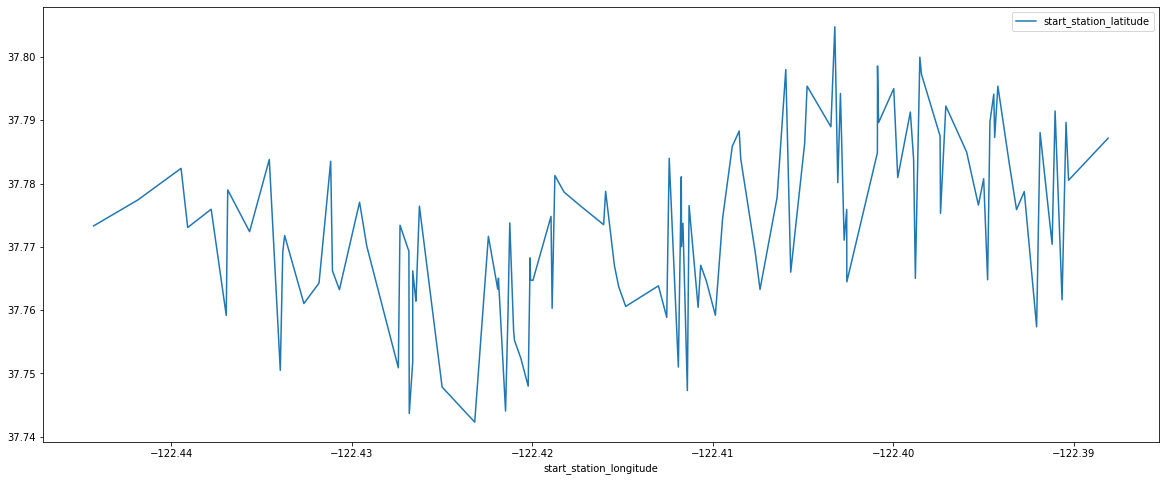

In [27]:
df_coor_stations.plot(
    x = 'start_station_longitude', 
    y = 'start_station_latitude', 
    figsize=(20,8))

3b. Hitung luas area yang dilingkup stasiun awal menggunakan library `Scipy`. Hasilnya bersatuan square degree.

In [28]:
from scipy.integrate import trapz

p = df_coor_stations.start_station_longitude
q = df_coor_stations.start_station_latitude

area = trapz(p,q) #trapz(Y,X)

print(f'Luas Stasiun Awal: {np.abs(area)} square degree')

Luas Stasiun Awal: 1.695947893094409 square degree


**Jawab Pertanyaan Berikut:**

### a. Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu!

>`A definite integral represents a number when the lower and upper limits are constants.` <br> `The indefinite integral represents a family of functions whose derivatives are f and There are no limits of integration in an indefinite integral.`
<br><br>
Mengapa menggunakan jenis *integral definite* untuk kasus ini, Karena kita akan menghitung luas area stasiun-stasiun di San Fransisco yang areanya terbatas berdasarkan koordinatnya, sehingga luasnya *tidak indefinite*.

### b. Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?

>Perhitungan *integral secara simbolik* akan menghasilkan *nilai simbolik* dan harus didefinisikan suatu fungsi simbolik sebagai *input* untuk diintegralkan. Misalkan $3x^2 + 1$ jika diintegralkan akan menghasilkan $x^3 + x$. <br>
<br>
Sedangkan perhitungan *integral secara numerik*, *input* nya bisa berupa fungsi(*quad method*) dan data points(*trapz method*) yang batas-batasnya (*upper and lower limits*) harus diketahui sehingga menghasilkan *nilai numerik dari hasil aproksimasi*. <br>
Karena untuk kasus ini kita menggunakan input data points (latitude dan longitude dari suatu area) maka kita akan menggunakan perhitungan integral numerik dengan metode trapz.

### c. Apakah diperlukan mendefinisikan fungsi matematis ( seperti `f(x) = x^2+2` ) pada kasus ini? Berikan penjelasan dan alasanmu!


>Tidak perlu.<br> 
pendefinisian fungsi matematis diperlukan jika kita menggunakan metode integral dari Library Scipy yang inputannya berupa fungsi (misalkan : quad, dblquad dan lain-lain). Sedangkan untuk kasus di atas, kita menggunakan metode trapezoidal yang inputannya berupa data points.